### Задача классификации на реальных данных

In [1]:
import tensorflow as tf
import numpy as np
# from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from torch.utils.data import Dataset, DataLoader
import datetime as dt
%matplotlib inline

# import torch
import pandas as pd
#
# from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import TensorBoard

%load_ext tensorboard

import time
from keras.callbacks import EarlyStopping
import sys, os

print(tf.__version__)

2.15.0


In [2]:
data = pd.read_csv("iris.csv",sep=";",index_col=False)
data

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(data['class'])
data['class'] = encoder.transform(data['class'])

In [4]:
data

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
data['class'].unique()

array([0, 1, 2])

In [6]:
data.columns

Index(['sepal_length_in_cm', 'sepal_width_in_cm', 'petal_length_in_cm',
       'petal_width_in_cm', 'class'],
      dtype='object')

In [5]:
def get_splited():

    norm = False

    mins = data.min()
    maxs = data.max()

    data_n = (data - mins) / (maxs - mins)
    data_n
    # data_zscale = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns)
    # data_zscale

    X = np.array(data_n[['sepal_length_in_cm']]).astype('float32')
    y = np.array(data_n[['class']]).astype('float32')
    # print(X)
    # print(y)



    if not norm:
        X_ = np.array(data.drop(columns=['class'])).astype('float32')
        y_ = np.array(data[['class']]).astype('float32')
        return train_test_split(X_, y_, test_size=0.4, random_state=333)

    return train_test_split(X, y, test_size=0.23, random_state=333)


X_train, X_test, y_train, y_test = get_splited()
y_train = y_train.ravel()
y_test = y_test.ravel()
X_train


array([[5.8, 4. , 1.2, 0.2],
       [5.8, 2.7, 3.9, 1.2],
       [5.3, 3.7, 1.5, 0.2],
       [6.6, 2.9, 4.6, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [6.2, 2.2, 4.5, 1.5],
       [5.4, 3.9, 1.3, 0.4],
       [6.1, 2.8, 4.7, 1.2],
       [5.6, 2.8, 4.9, 2. ],
       [6.4, 3.2, 5.3, 2.3],
       [7.4, 2.8, 6.1, 1.9],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 3.6, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 2.3, 3.3, 1. ],
       [7.7, 3.8, 6.7, 2.2],
       [7.1, 3. , 5.9, 2.1],
       [6.9, 3.1, 5.1, 2.3],
       [4.8, 3.4, 1.6, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [6.5, 3. , 5.8, 2.2],
       [5.5, 2.4, 3.8, 1.1],
       [4.9, 3. , 1.4, 0.2],
       [6.8, 2.8, 4.8, 1.4],
       [4.8, 3. , 1.4, 0.3],
       [5. , 3.3, 1.4, 0.2],
       [6.9, 3.1, 4.9, 1.5],
       [6.8, 3.2, 5.9, 2.3],
       [5. , 2. , 3.5, 1. ],
       [6.7, 3.1, 4.7, 1.5],
       [5. , 3. , 1.6, 0.2],
       [5.7, 2.8, 4.1, 1.3],
       [5.4, 3. , 4.5, 1.5],
       [5.4, 3.7, 1.5, 0.2],
       [5.7, 2

In [6]:
y_train.ravel()

# [[0], [0], [1]]
#[0, 0, 1]

array([0., 1., 0., 1., 0., 1., 0., 1., 2., 2., 2., 0., 0., 0., 1., 2., 2.,
       2., 0., 0., 2., 1., 0., 1., 0., 0., 1., 2., 1., 1., 0., 1., 1., 0.,
       2., 2., 0., 1., 1., 1., 2., 0., 2., 0., 1., 1., 1., 2., 2., 0., 1.,
       0., 0., 1., 0., 0., 2., 1., 0., 1., 0., 2., 2., 1., 1., 2., 0., 1.,
       1., 1., 2., 2., 1., 2., 0., 2., 2., 2., 2., 0., 1., 2., 0., 1., 1.,
       0., 0., 2., 2., 0.], dtype=float32)

In [ ]:
data.columns

Index(['sepal_length_in_cm', 'sepal_width_in_cm', 'petal_length_in_cm',
       'petal_width_in_cm', 'class'],
      dtype='object')

In [ ]:
iris_setosa = data.loc[lambda df: df['class'] == 'Iris-setosa']
y = np.array(data[['sepal_length_in_cm']]).astype('float32')
x = np.array(data[['petal_length_in_cm']]).astype('float32')

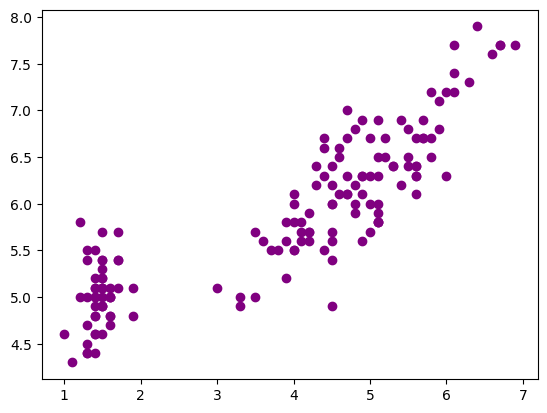

In [ ]:
iris_setosa = data.loc[lambda df: df['class'] == 'Iris-setosa']
plt.scatter(x,y, color='purple')
plt.show()

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

model = SVC()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([0., 2., 0., 0., 0., 2., 0., 1., 1., 2., 2., 1., 0., 2., 2., 1., 0.,
       0., 2., 2., 2., 0., 1., 1., 2., 2., 0., 0., 1., 1., 1., 0., 1., 2.,
       2., 0., 2., 1., 2., 0., 1., 1., 1., 1., 2., 2., 1., 0., 2., 1., 2.,
       0., 2., 2., 0., 2., 0., 1., 2., 0.], dtype=float32)

In [15]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000        19
         1.0     0.9444    0.8947    0.9189        19
         2.0     0.9130    0.9545    0.9333        22

    accuracy                         0.9500        60
   macro avg     0.9525    0.9498    0.9508        60
weighted avg     0.9505    0.9500    0.9499        60



In [20]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

model = SVC()

parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10 ,100],
    'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
    'degree': [i for i in range(2, 6)]
}

grid = GridSearchCV(model, parameters, cv=5)
grid.fit(X_train, y_train)
grid.cv_results_

{'mean_fit_time': array([0.00373764, 0.00186334, 0.00372291, 0.00503831, 0.0034266 ,
        0.0040185 , 0.0049129 , 0.00222621, 0.00188713, 0.00163531,
        0.00165677, 0.00213695, 0.00184455, 0.0014977 , 0.00262237,
        0.00465569, 0.00192113, 0.0016571 , 0.00152044, 0.00681195,
        0.01110263, 0.00191989, 0.00150614, 0.00203199, 0.00172791,
        0.00137448, 0.00153503, 0.00689483, 0.00703778, 0.00779052,
        0.00746031, 0.00338869, 0.00173645, 0.00153008, 0.00138049,
        0.00227113, 0.00173011, 0.00139761, 0.00145345, 0.00437512,
        0.00189614, 0.00147052, 0.00141249, 0.00206094, 0.00177107,
        0.00145564, 0.00143104, 0.00229087, 0.00153227, 0.00161719,
        0.00135903, 0.00230541, 0.00153298, 0.00497031, 0.00374827,
        0.00220799, 0.00157423, 0.00155187, 0.00138497, 0.00475144,
        0.00378757, 0.00315928, 0.00138927, 0.00761971, 0.00156288,
        0.00149703, 0.00146766, 0.00215473, 0.00157084, 0.00346723,
        0.00430393, 0.00219221,

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

model = SVC(C=1, degree=2, kernel='linear')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([0., 2., 0., 0., 0., 2., 0., 1., 1., 2., 2., 1., 0., 2., 2., 1., 0.,
       0., 2., 2., 2., 0., 1., 1., 2., 2., 0., 0., 1., 1., 1., 0., 1., 2.,
       1., 0., 2., 1., 2., 0., 2., 1., 1., 1., 2., 2., 1., 0., 2., 1., 2.,
       0., 2., 2., 0., 1., 0., 1., 2., 0.], dtype=float32)

In [19]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000        19
         1.0     0.9474    0.9474    0.9474        19
         2.0     0.9545    0.9545    0.9545        22

    accuracy                         0.9667        60
   macro avg     0.9673    0.9673    0.9673        60
weighted avg     0.9667    0.9667    0.9667        60



### Собственные функции

In [ ]:
from tensorflow.keras import layers


class linear_phase(layers.Layer):
    def __init__(self, alpha=1.0, **kwargs):
        super(linear_phase, self).__init__(**kwargs)
        self.alpha = alpha

    def call(self, inputs):
        return tf.keras.activations.linear(inputs)

class alpha_sigmoid(layers.Layer):
    def __init__(self, alpha=1.0, **kwargs):
        super(alpha_sigmoid, self).__init__(**kwargs)
        self.alpha = alpha

    def call(self, inputs):
        return 1 / (1 + tf.exp(-self.alpha * inputs))

class leaky_relu_own(layers.Layer):
    def __init__(self, negative_slope=1.0, **kwargs):
        super(leaky_relu_own, self).__init__(**kwargs)
        self.negative_slope = negative_slope

    def call(self, inputs):
        return tf.keras.activations.leaky_relu(inputs, negative_slope=self.negative_slope)

class x_3(layers.Layer):
    def __init__(self, alpha=1.0, **kwargs):
        super(x_3, self).__init__(**kwargs)
        self.alpha = alpha

    def call(self, inputs):
        return 1 / (1 + tf.exp(-self.alpha * inputs))

class x_2(layers.Layer):
    def __init__(self, **kwargs):
        super(x_2, self).__init__(**kwargs)

    def build(self, input_shape):
        super(x_2, self).build(input_shape)

    def call(self, inputs):
        return tf.square(inputs)

    def compute_output_shape(self, input_shape):
        return input_shape


class CustomELU(layers.Layer):
    def __init__(self, alpha=1.0, **kwargs):
        super(CustomELU, self).__init__(**kwargs)
        self.alpha = alpha

    def call(self, inputs):
        return tf.keras.activations.elu(inputs, alpha=self.alpha)



In [ ]:
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w',encoding='utf-8')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout


In [ ]:
model = tf.keras.Sequential([
    layers.Dense(1,  input_dim=1),
    # layers.Dense(70,activation='tanh'),
    # layers.Dense(70,activation='tanh'),
    # layers.Dense(100,activation='relu'),
    # layers.Dense(100,activation='relu'),

    layers.Dense(70),
    x_2(),
    layers.Dense(70),
    x_2(),
    # alpha_sigmoid(alpha=7),
    layers.Dense(1)
])

early_stopping = EarlyStopping(monitor='loss', patience=10, verbose=0, mode='max',start_from_epoch=100)
optim = tf.keras.optimizers.SGD(learning_rate=0.001)
history = 0
start_time = time.time()
model.compile(loss='mae', optimizer='Adam', metrics=['mse','mae','mape'])
with HiddenPrints():
    history = model.fit(X_train, y_train, epochs=1000,
                       #callbacks=[early_stopping]
                       )
end_time = time.time()
print(end_time - start_time)
len(history.history['loss'])

6.224279403686523


100

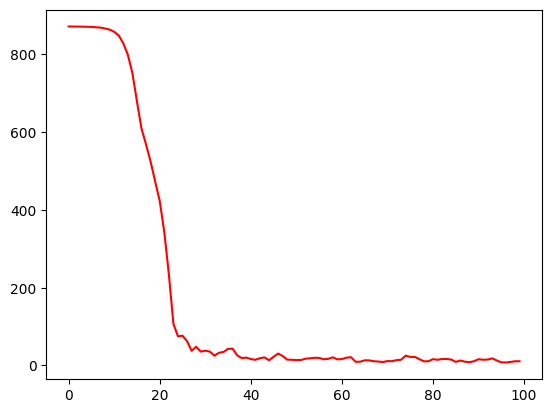

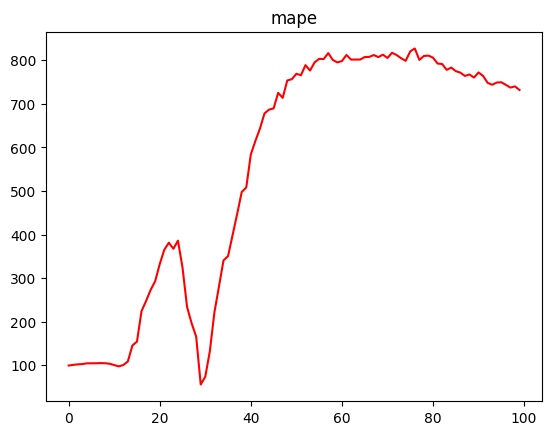

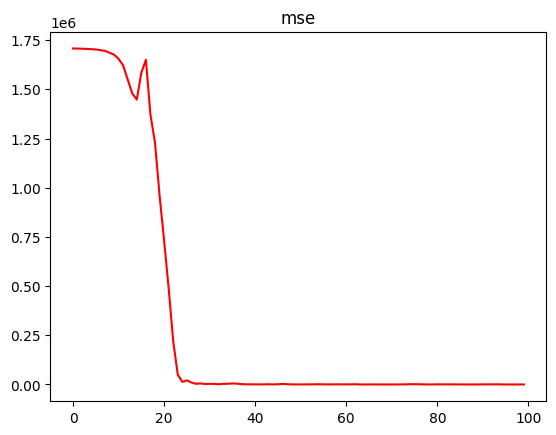

In [ ]:
plt.plot(history.history['loss'], color='red')
plt.show()
plt.plot(history.history['mape'], color='red',label='mape')
plt.title('mape')
plt.show()
plt.plot(history.history['mse'], color='red',label='mae')
plt.title('mse')
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


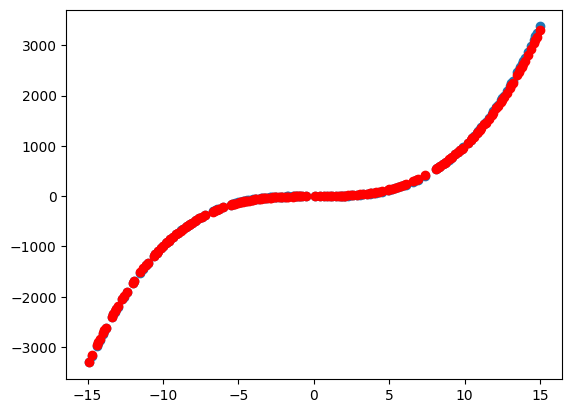

In [ ]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, model.predict(X_train), color='red')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


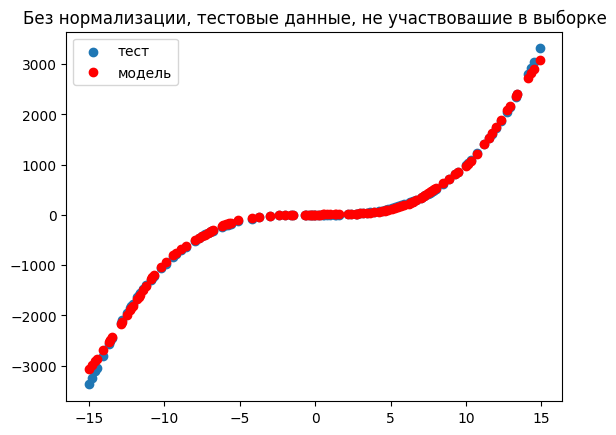

In [ ]:
plt.scatter(X_test, y_test,label = "тест")
plt.scatter(X_test, model.predict(X_test), color='red',label = "модель")
plt.legend(loc='best')
plt.title('Без нормализации, тестовые данные, не участвовашие в выборке')
plt.show()

### Проверка сильно за границей

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step


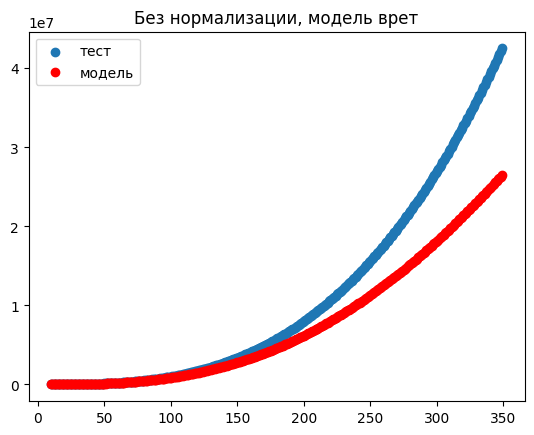

In [ ]:

x_ = [i for i in range(10,350)]
y_ = [x**3 for x in x_]
X_ = np.array(x_).astype('float32')
Y_ = np.array(y_).astype('float32')

df = pd.DataFrame(X_)
df.columns = [['x']]

X_ = df[['x']]

plt.scatter(X_, Y_,label = "тест")
plt.scatter(X_, model.predict(X_), color='red',label="модель")
plt.legend(loc='best')
plt.title('Без нормализации, модель врет')
plt.show()

In [ ]:
df

,x
0,10.0
1,11.0
2,12.0
3,13.0
4,14.0
5,15.0
6,16.0
7,17.0
8,18.0
9,19.0


### Денормализация (из исходных данных) и проверка

In [ ]:
X_d = np.array(data[['x']]).astype('float32')
y_d = np.array(data[['y']]).astype('float32')

X_train_d, X_test_d, y_train_d, y_test_d = get_splited(X_d, y_d)

X_test_d


array([[-13.6],
       [ -1.5],
       [ -6.9],
       [-12.8],
       [  3.6],
       [ -9.4],
       [-13.5],
       [-11.8],
       [  7.3],
       [-11.7],
       [ 13.4],
       [ 14.9],
       [  4.2],
       [-10.7],
       [  8.5],
       [ -8. ],
       [-12.5],
       [ -3. ],
       [-12.3],
       [ -0.1],
       [  7.9],
       [  3. ],
       [ -5.6],
       [  5.5],
       [  6.5],
       [  2.2],
       [ -5.9],
       [ -9.9],
       [ 11.2],
       [  1.3],
       [  7. ],
       [-14.8],
       [  6.7],
       [ -4.2],
       [  3.2],
       [ -7.1],
       [ -6.1],
       [  7.1],
       [  9.5],
       [ -6.2],
       [ -0.3],
       [ 14.1],
       [ -3.7],
       [-14.6],
       [  1. ],
       [  2.8],
       [ 10.7],
       [-11.2],
       [-15. ],
       [  0.6],
       [  2.7],
       [ 10.3],
       [  4.8],
       [  8.9],
       [ -0. ],
       [  3.4],
       [  0.5],
       [-10.2],
       [  7.2],
       [ -9.2],
       [ 14.5],
       [-10.9],
       [

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


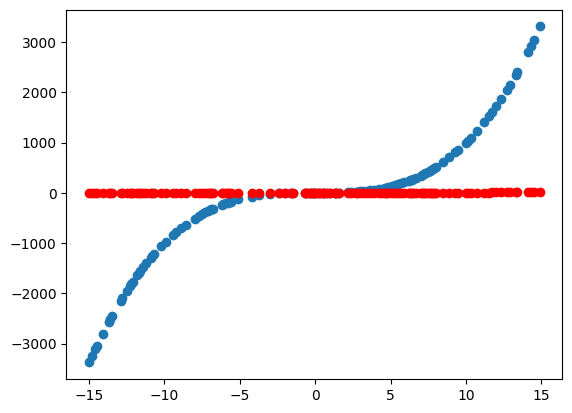

In [ ]:
plt.scatter(X_test_d, y_test_d)
plt.scatter(X_test_d, model.predict(X_test_d), color='red')
plt.show()

### Денормализация настоящая

In [ ]:
mins = data.min()
maxs = data.max()

data_n = (data - mins) / (maxs - mins)
data_n

,x,y
0,0.000000,0.000000
1,0.003333,0.009933
2,0.006667,0.019735
3,0.010000,0.029404
4,0.013333,0.038943
...,...,...
296,0.986667,0.961057
297,0.990000,0.970596
298,0.993333,0.980265
299,0.996667,0.990067


In [ ]:
# Формула денормализации
mins = data.min()
maxs = data.max()

data_dn = data_n*(maxs - mins) + mins
data_dn

,x,y
0,-15.0,-3375.000
1,-14.9,-3307.949
2,-14.8,-3241.792
3,-14.7,-3176.523
4,-14.6,-3112.136
...,...,...
296,14.6,3112.136
297,14.7,3176.523
298,14.8,3241.792
299,14.9,3307.949


 Модель "понимает" только нормализованные данные. На вход норм на выход норм, а далее денорм.

        x         y
0   -15.0 -3375.000
1   -14.9 -3307.949
2   -14.8 -3241.792
3   -14.7 -3176.523
4   -14.6 -3112.136
..    ...       ...
296  14.6  3112.136
297  14.7  3176.523
298  14.8  3241.792
299  14.9  3307.949
300  18.0  5832.000

[301 rows x 2 columns]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


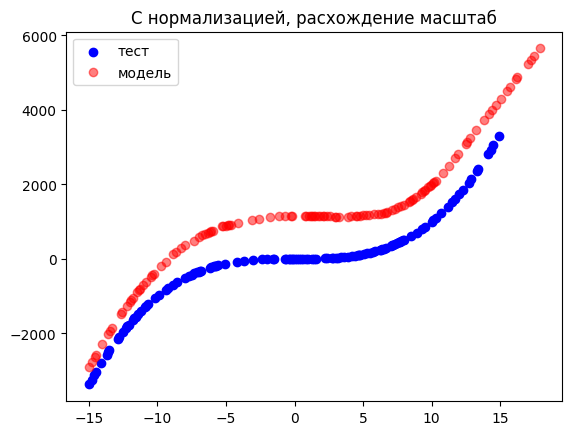

In [ ]:
# a = data.append()
# data.append({'x':30,'y':30**3})
# data.append({'x':35,'y':35**3})

data1 = data.loc[[300],['x']] = 18
data1 = data.loc[[300],['y']] = 18**3

# data1 = data1.loc[[301],['x']] = 25
# data1 = data1.loc[[301],['y']] = 25**3

print(data)
# print(data1)

X_d = np.array(data[['x']]).astype('float32')
y_d = np.array(data[['y']]).astype('float32')

X_train_d, X_test_d, y_train_d, y_test_d = get_splited(X_d, y_d)

# Формула денормализации для игреков
mins_у = data['y'].min()
maxs_у = data['y'].max()

mins_x = data['x'].min()
maxs_x = data['x'].max()

X_test_dp = model.predict(X_test)*(maxs_у - mins_у) + mins_у
X_test_dx = X_test*(maxs_x - mins_x) + mins_x

# зеленая - денормализованные тестовые в чистом виде без исопльзования модели
plt.scatter(X_test_d, y_test_d,color='blue',label = "тест")
# красные точки - предсказанные моделью денормализованные данные
plt.scatter(X_test_dx, X_test_dp, color='red',alpha=0.5,label="модель")
plt.legend(loc='best')
plt.title('С нормализацией, расхождение масштаб')
# синяя - зависимость которой обучали модель
dyn_y = [3*i+7 for i in range(-150,150)]
dyn_x =  [i for i in range(-150,150)]
# plt.plot(dyn_x,dyn_y,color='blue')
plt.show()


In [ ]:
model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[ 0.1094039 ],
       [ 0.5001949 ],
       [ 0.44699198],
       [ 0.17827764],
       [ 0.50866395],
       [ 0.3777642 ],
       [ 0.11848779],
       [ 0.25182608],
       [ 0.5556074 ],
       [ 0.2582429 ],
       [ 0.8661149 ],
       [ 0.9572224 ],
       [ 0.51281697],
       [ 0.31459144],
       [ 0.58994794],
       [ 0.4212322 ],
       [ 0.20224597],
       [ 0.49616617],
       [ 0.21822524],
       [ 0.50136185],
       [ 0.57279253],
       [ 0.5055329 ],
       [ 0.47212744],
       [ 0.5267814 ],
       [ 0.5399512 ],
       [ 0.5028307 ],
       [ 0.46635455],
       [ 0.35350105],
       [ 0.72894335],
       [ 0.5022742 ],
       [ 0.54884624],
       [ 0.00360103],
       [ 0.5432565 ],
       [ 0.48767188],
       [ 0.50657845],
       [ 0.44308805],
       [ 0.4625042 ],
       [ 0.5507081 ],
       [ 0.61847126],
       [ 0.46057847],
       [ 0.5012296 ],
       [ 0.90901494],
       [ 0.4919541 ],
       [ 0.01975257],
       [ 0.50208336],
       [ 0

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


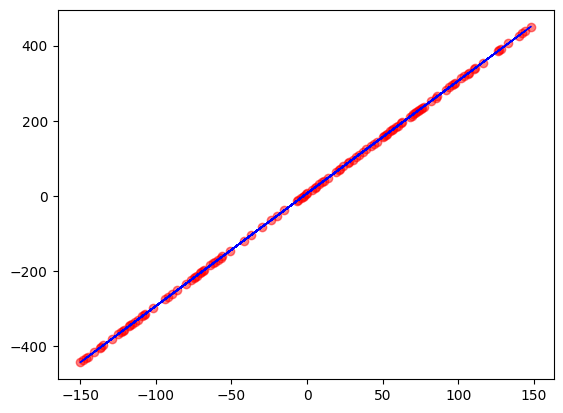

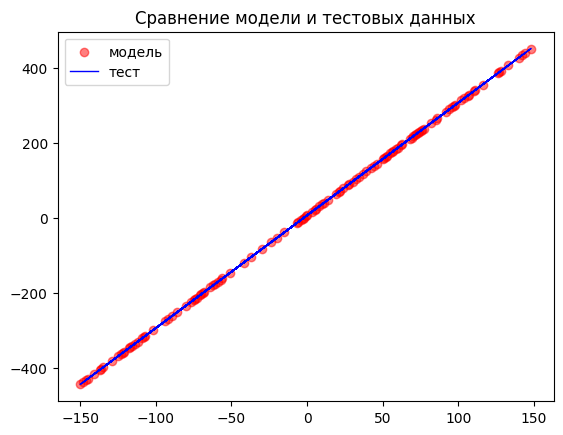

In [ ]:
    mins = data.min()
    maxs = data.max()

    data_n = (data - mins) / (maxs - mins)

    mins = data.min()
    maxs = data.max()

    data_dn = data_n*(maxs - mins) + mins

    X_d = np.array(data_dn[['x']]).astype('float32')
    y_d = np.array(data_dn[['y']]).astype('float32')

    X_train_d, X_test_d, y_train_d, y_test_d = get_splited(X_d, y_d)

    X = np.array(data_n[['x']]).astype('float32')
    y = np.array(data_n[['y']]).astype('float32')


    X_train, X_test, y_train, y_test = get_splited(X, y)

    # Формула денормализации для игреков
    mins_у = data['y'].min()
    maxs_у = data['y'].max()

    mins_x = data['x'].min()
    maxs_x = data['x'].max()

    X_test_dp = model.predict(X_test)*(maxs_у - mins_у) + mins_у
    X_test_dx = X_test*(maxs_x - mins_x) + mins_x

    # зеленая - денормализованные тестовые в чистом виде без исопльзования модели
    plt.scatter(X_test_dx, X_test_dp, color='red',alpha=0.5)
    plt.plot(X_test_d, y_test_d,color='blue', linewidth=1, alpha=1)
    # красные точки - предсказанные моделью денормализованные данные

    # синяя - зависимость которой обучали модель
    dyn_y = [3*i+7 for i in range(-150,150)]
    dyn_x =  [i for i in range(-150,150)]
    # plt.plot(dyn_x,dyn_y,color='blue')
    plt.show()

    from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

    fig, ax = plt.subplots()
    # модель
    ax.scatter(X_test_dx, X_test_dp, color='red',alpha=0.5, label="модель")
    # тестовые данные
    ax.plot(X_test_d, y_test_d,color='blue', linewidth=1, alpha=1, label = "тест")
    ax.legend(loc='best')

    ax.title.set_text("Сравнение модели и тестовых данных")

    canvas = FigureCanvas(fig)
    canvas.print_figure("C:/Users/Practice/temp_image_dir/aaa.png")  # Сохранение графика в файл

### Проверка на массиве x от 500 до 1000

In [ ]:
X_ultra_test = np.array([x for x in range(500,1000,1)]).astype('float32')
X_ultra_test

array([500., 501., 502., 503., 504., 505., 506., 507., 508., 509., 510.,
       511., 512., 513., 514., 515., 516., 517., 518., 519., 520., 521.,
       522., 523., 524., 525., 526., 527., 528., 529., 530., 531., 532.,
       533., 534., 535., 536., 537., 538., 539., 540., 541., 542., 543.,
       544., 545., 546., 547., 548., 549., 550., 551., 552., 553., 554.,
       555., 556., 557., 558., 559., 560., 561., 562., 563., 564., 565.,
       566., 567., 568., 569., 570., 571., 572., 573., 574., 575., 576.,
       577., 578., 579., 580., 581., 582., 583., 584., 585., 586., 587.,
       588., 589., 590., 591., 592., 593., 594., 595., 596., 597., 598.,
       599., 600., 601., 602., 603., 604., 605., 606., 607., 608., 609.,
       610., 611., 612., 613., 614., 615., 616., 617., 618., 619., 620.,
       621., 622., 623., 624., 625., 626., 627., 628., 629., 630., 631.,
       632., 633., 634., 635., 636., 637., 638., 639., 640., 641., 642.,
       643., 644., 645., 646., 647., 648., 649., 65